# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

In [160]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

- Use pandas_datareader(): Up-to-date remote data access functionfor pandas

In [161]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 국제 금가격 (런던 금시장)
- Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
  * (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
  * 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

- FRED (세인트루이스 연방준비은행 경제 데이터)
  - FRED changed URL structure for downloading CSV. (2022-09-30)

In [162]:
import pandas as pd
import pandas_datareader as pdr

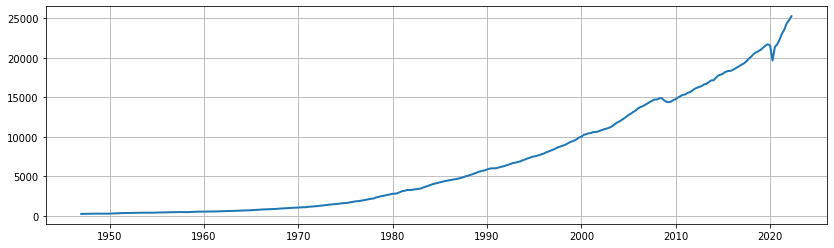

In [163]:
# using pandas_datareader

df = pdr.DataReader('GDP', 'fred', start='1947-01-01')
# df_gold.head(3).append(df_gold.tail(3))
plt.plot(df['GDP'])

In [164]:
# pd.datareader can read various data
df = pdr.data.DataReader('TUD', 'oecd')    # TUD (trade (or labor) union dataset) of oecd countries
df.head(10).T.sample(5)

Time                                              2018-01-01  2019-01-01  \
Country        Frequency Measure                                           
Mexico         Annual    Percentage of employees   12.500000   12.300000   
Germany        Annual    Percentage of employees   16.700001   16.299999   
Czech Republic Annual    Percentage of employees   11.700000         NaN   
New Zealand    Annual    Percentage of employees   17.500000         NaN   
Lithuania      Annual    Percentage of employees    7.700000    7.400000   

Time                                              2020-01-01  
Country        Frequency Measure                              
Mexico         Annual    Percentage of employees        12.4  
Germany        Annual    Percentage of employees         NaN  
Czech Republic Annual    Percentage of employees         NaN  
New Zealand    Annual    Percentage of employees         NaN  
Lithuania      Annual    Percentage of employees         NaN

In [165]:
# or 
df = pdr.get_data_fred('GDP', start='1947-01-01', ) 
df.head(3).append(df.tail(3))

GDP
DATE                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
2021-10-01  24349.121
2022-01-01  24740.480
2022-04-01  25248.476

In [166]:
df.columns, df.index, df.dtypes

(Index(['GDP'], dtype='object'),
 DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
                '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
                '1949-01-01', '1949-04-01',
                ...
                '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
                '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
                '2022-01-01', '2022-04-01'],
               dtype='datetime64[ns]', name='DATE', length=302, freq=None),
 GDP    float64
 dtype: object)

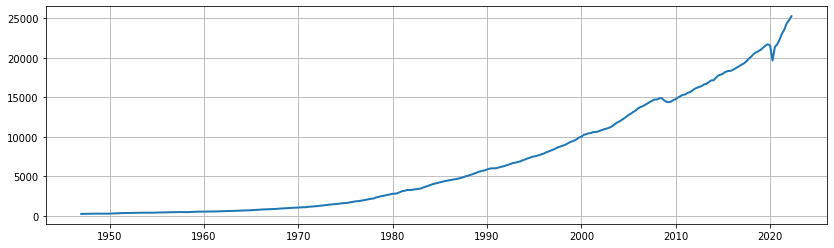

In [167]:
plt.plot(df['GDP'])

In [168]:
# or accessing directly from csv file
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=GDP')
df.head(3).append(df.tail(3))

DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
299  2021-10-01  24349.121
300  2022-01-01  24740.480
301  2022-04-01  25248.476

In [169]:
# new site for FRED
url = 'http://research.stlouisfed.org/fred2/series/GDP/downloaddata/GDP.csv'
df_gold = pd.read_csv(url)
df_gold.head(3).append(df_gold.tail(3))

DATE      VALUE
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
299  2021-10-01  24349.121
300  2022-01-01  24740.480
301  2022-04-01  25248.476

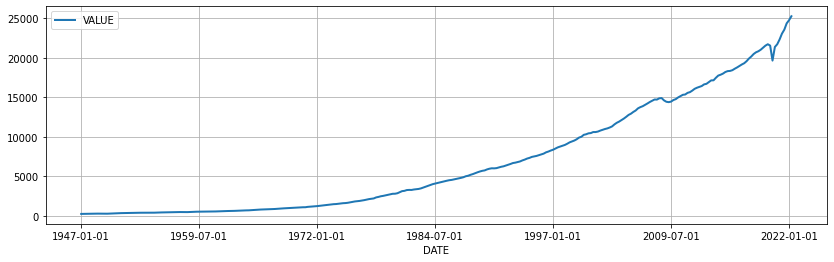

In [170]:
df_gold.plot('DATE', 'VALUE')

# 국제 은 가격
- Quandl: 캐나다 토론토의 데이터 공유 플랫폼 회사입니다(특히 금융 데이터): https://www.quandl.com
- "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격 

-  To access QUANDL,
  - (1)In order to retrieve data from quandl, you need to register for and input (via the parameter api_key or the environment variable QUANDL_API_KEY) a Quandl API key. Registering for a key can be done here (https://docs.quandl.com/docs#section-authentication).
  - (2) And also, you need to confirm the email message sent from quandl.

In [171]:
# 영국 은(silver)
API_KEY = 'NL_Uy8FexdtU3M6Zxb9a'
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', access_key=API_KEY, start='2000-01-01')
df_silver.head(3).append(df_silver.tail(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead
  This is separate from the ipykernel package so we can avoid doing imports until


USD       GBP      EURO
Date                                   
2022-09-29  18.6700  17.23000  19.22000
2022-09-28  18.2550  17.13000  19.08000
2022-09-27  18.6800  17.29000  19.40000
2000-01-06   5.1400   3.11515   4.94231
2000-01-05   5.2850   3.22354   5.10135
2000-01-04   5.3025   3.23225   5.13808

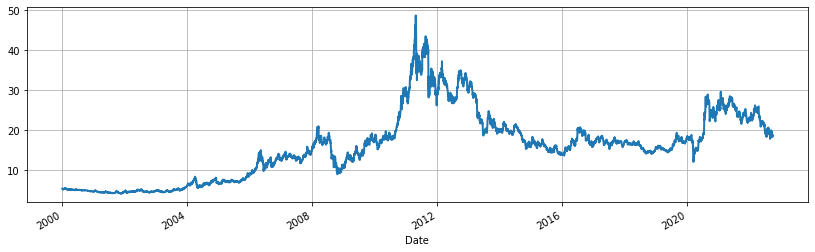

In [172]:
df_silver['USD'].plot()

# 국제 구리 가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격), 3Months(3개월 선물가격), 15Months(15개월 선물가격) 등  

In [173]:
# LME 구리 가격
# df_copper = pdr.DataReader('LME/PR_CU', 'quandl', access_key='NL_Uy8FexdtU3M6Zxb9a', start='2000-01-01' )
# df_copper.tail(10)

# Quandl library 를 이용하는 방법

In [174]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import quandl

quandl.ApiConfig.api_key = 'NL_Uy8FexdtU3M6Zxb9a'
df_gold = quandl.get(dataset='LBMA/GOLD', start_date='2010-01-01', end_date='2022-09-01')
df_gold.head(3).append(df_gold.tail(3))

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2010-01-04   1113.00   1121.50   686.825   693.483    774.261    777.470
2010-01-05   1125.25   1123.25   701.702   700.324    779.529    779.385
2010-01-06   1125.00   1130.00   702.774   708.020    783.317    786.579
2022-08-30   1734.00   1730.30  1475.810  1481.310   1726.370   1727.360
2022-08-31   1712.40   1715.90  1472.150  1478.080   1713.600   1715.210
2022-09-01   1706.00   1694.30  1471.080  1469.640   1701.740   1702.260

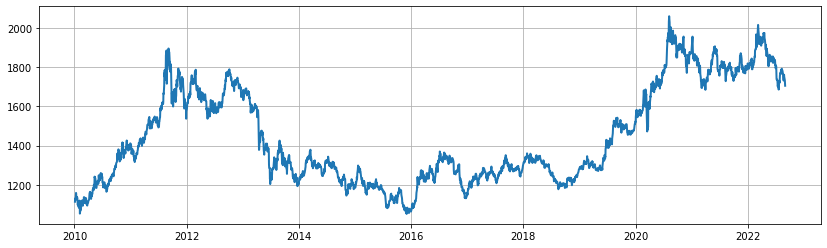

In [176]:
plt.plot(df_gold.iloc[:, 0])   # UsD

In [177]:
df_silver = quandl.get(dataset='LBMA/SILVER', start_date='2010-01-01', end_date='2022-09-01')
df_silver.head(3).append(df_silver.tail(3))

USD      GBP     EURO
Date                                
2010-01-04  17.170  10.5857  11.9319
2010-01-05  17.570  10.9744  12.1845
2010-01-06  17.890  11.1952  12.4669
2022-08-30  18.695  15.9500  18.6400
2022-08-31  17.945  15.4400  17.9800
2022-09-01  17.770  15.3700  17.7400

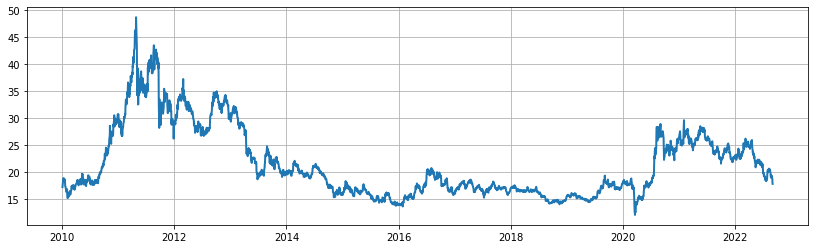

In [178]:
plt.plot(df_silver.iloc[:, 0])   # UsD

In [179]:
# Copper is not available at this time
# df_copper = quandl.get(dataset='LME/PR_CU', start_date='2010-01-01', end_date='2022-09-01')
# df_copper.head(3).append(df_copper.tail(3))

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표 
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [182]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')
df_oil.head(3).append(df_oil.tail(3))

POILDUBUSDM  POILWTIUSDM
DATE                                
2000-01-01    23.359524    27.080476
2000-02-01    24.720000    29.006190
2000-03-01    25.096957    29.460435
2022-06-01   111.859545   114.675909
2022-07-01   100.318571   101.918095
2022-08-01    95.693043    93.692609

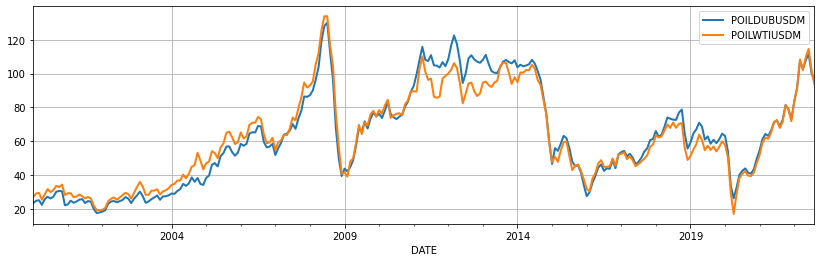

In [183]:
df_oil.plot()

## 두 가격의 차이
- 두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다. 

In [186]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

POILDUBUSDM  POILWTIUSDM      diff
DATE                                          
2021-11-01    78.657727    79.095455 -0.437727
2021-12-01    72.847826    71.802174  1.045652
2022-01-01    83.450952    83.277619  0.173333
2022-02-01    91.525000    91.608000 -0.083000
2022-03-01   107.587826   108.399130 -0.811304
2022-04-01   102.755238   101.985238  0.770000
2022-05-01   107.861364   109.712727 -1.851364
2022-06-01   111.859545   114.675909 -2.816364
2022-07-01   100.318571   101.918095 -1.599524
2022-08-01    95.693043    93.692609  2.000435

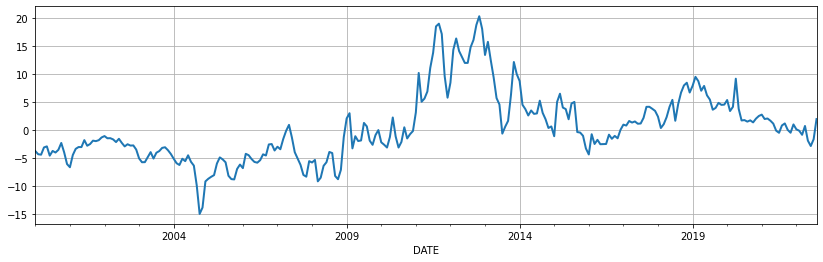

In [187]:
df_oil['diff'].plot()

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.

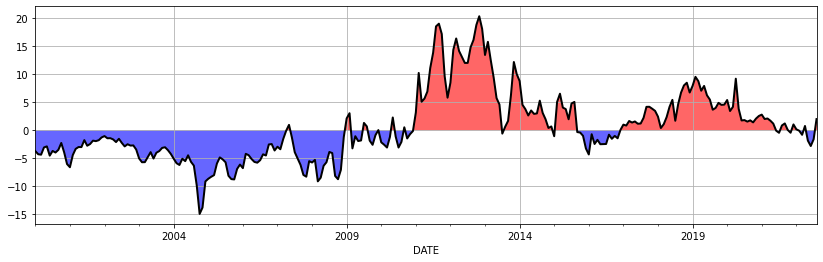

In [188]:
ax = df_oil['diff'].plot(color='k')

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, 0, y, where=y > 0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y <= 0, facecolor='b', alpha=0.6, interpolate=True)